In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import sys
sys.path.append('/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream')
from luxgiant_dstream.prep_ds import PrepDS
from luxgiant_dstream.gwas import GWAS

In [2]:
params = json.load(open("//home/luis/data/testDownStream/configFiles/parameters.JSON"))
paths = json.load(open("//home/luis/data/testDownStream/configFiles/paths_local.JSON"))

In [3]:
prep = PrepDS(
    input_path=paths['input_directory'],
    input_name=paths['input_prefix'],
    output_path=paths['output_directory'],
    output_name=paths['output_prefix'],
    config_dict=params,
    dependables_path=paths['dependables_directory'],
)

In [4]:
prep_steps = {
    'ld_prune': prep.exclude_high_ld_hla,
    'pca'     : prep.pca_decomposition
}

for step in prep_steps.keys():
    prep_steps[step]()

PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/testDownStream/outputData/preparatory/ds_results_prunning.log.
Options in effect:
  --bfile /home/luis/data/testDownStream/inputData/subset_data_luxgiant
  --chr 1-22
  --exclude /home/luis/data/testDownStream/dependables/high-LD-regions.txt
  --geno 0.1
  --hwe 5e-08
  --indep-pairwise 50 5 0.2
  --maf 0.05
  --make-bed
  --out /home/luis/data/testDownStream/outputData/preparatory/ds_results_prunning
  --range
  --threads 30

Note: --range flag deprecated.  Use e.g. "--extract range <filename>".
63927 MB RAM detected; reserving 31963 MB for main workspace.
23169127 variants loaded from .bim file.
466 people (322 males, 144 females) loaded from .fam.
466 phenotype values loaded from .fam.
--exclude range: 499022 variants excluded.
--exclude range: 22670105 variants remaining.
Using 1 thread (no multithre

In [2]:
df_gene = pd.read_csv("/home/luis/data/testDownStream/outputData/snps_top_hits.txt", sep="\t")
#df_gwas = pd.read_csv("/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream/data/luxgiant_manhattan_input_final.txt", sep="\t")

In [2]:


gwas = GWAS(
    input_path='/home/luis/data/testDownStream/inputData',
    input_name="subset_data_luxgiant",
    output_path='/home/luis/data/testDownStream/outputData',
    output_name="results",
    config_dict=params,
    dependables_path='/home/luis/data/testDownStream/dependables',
)

In [4]:
gwas.exclude_high_ld_hla()

plink --bfile /home/luis/data/testDownStream/outputData/gwas_analysis/results --chr 1-22 --maf 0.05 --geno 0.1  --hwe 5e-08 --exclude /home/luis/data/testDownStream/dependables/high-LD-regions.txt --range --indep-pairwise 50 5 0.2 --threads 30 --make-bed --out /home/luis/data/testDownStream/outputData/gwas_analysis/results_prunning
PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/testDownStream/outputData/gwas_analysis/results_prunning.log.
Options in effect:
  --bfile /home/luis/data/testDownStream/outputData/gwas_analysis/results
  --chr 1-22
  --exclude /home/luis/data/testDownStream/dependables/high-LD-regions.txt
  --geno 0.1
  --hwe 5e-08
  --indep-pairwise 50 5 0.2
  --maf 0.05
  --make-bed
  --out /home/luis/data/testDownStream/outputData/gwas_analysis/results_prunning
  --range
  --threads 30

Note: --range flag deprecated.  Use e.g. "--extrac

{'pass': True,
 'step': 'ld_prune',
 'output': {'plink_out': '/home/luis/data/testDownStream/outputData/gwas_analysis'}}

In [5]:
gwas.pca_decomposition()

PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/testDownStream/outputData/gwas_analysis/results_pca.log.
Options in effect:
  --bfile /home/luis/data/testDownStream/outputData/gwas_analysis/results_LDpruned
  --out /home/luis/data/testDownStream/outputData/gwas_analysis/results_pca
  --pca 10
  --threads 30

63927 MB RAM detected; reserving 31963 MB for main workspace.
321179 variants loaded from .bim file.
466 people (322 males, 144 females) loaded from .fam.
466 phenotype values loaded from .fam.
Using up to 30 threads (change this with --threads).
Before main variant filters, 466 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping 

{'pass': True,
 'step': 'pca_decomposition',
 'output': {'plink_out': '/home/luis/data/testDownStream/outputData/gwas_analysis'}}

In [3]:
gwas.fixed_model_association_analysis()

PLINK v2.00a6LM 64-bit Intel (18 Aug 2024)     www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/testDownStream/outputData/gwas_analysis/results_glm1.log.
Options in effect:
  --adjust
  --bfile /home/luis/data/testDownStream/inputData/subset_data_luxgiant
  --ci 0.95
  --covar /home/luis/data/testDownStream/outputData/gwas_analysis/results_pca.eigenvec
  --glm hide-covar omit-ref sex cols=+a1freq,+beta
  --hwe 5e-08
  --maf 0.05
  --mind 0.1
  --out /home/luis/data/testDownStream/outputData/gwas_analysis/results_glm1
  --threads 30

Start time: Mon Sep  2 14:36:43 2024
63927 MiB RAM detected, ~58718 available; reserving 31963 MiB for main
workspace.
Using up to 30 threads (change this with --threads).
466 samples (144 females, 322 males; 466 founders) loaded from
/home/luis/data/testDownStream/inputData/subset_data_luxgiant.fam.
23169127 variants loaded from
/home/luis/data/testDownStream/inputData

{'pass': True,
 'step': 'association_analysis',
 'output': {'plink_out': '/home/luis/data/testDownStream/outputData/gwas_analysis'}}

In [4]:
gwas.get_top_hits()

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version v1.94.1 Linux
* Built at Nov 15 2022 21:14:25, by GCC 8.5
* (C) 2010-present, Yang Lab, Westlake University
* Please report bugs to Jian Yang <jian.yang@westlake.edu.cn>
*******************************************************************
Analysis started at 14:59:52 CEST on Mon Sep 02 2024.
Hostname: IKEAB-TS-P3

Accepted options:
--bfile /home/luis/data/testDownStream/inputData/subset_data_luxgiant
--maf 0.05
--cojo-slct
--cojo-file /home/luis/data/testDownStream/outputData/gwas_analysis/cojo_file.ma
--out /home/luis/data/testDownStream/outputData/gwas_analysis/cojo_file
--thread-num 30


Reading PLINK FAM file from [/home/luis/data/testDownStream/inputData/subset_data_luxgiant.fam].
466 individuals to be included from [/home/luis/data/testDownStream/inputData/subset_data_luxgiant.fam].
Reading PLINK BIM file from [/home/luis/data/testDownStream/inputData/subset_da

{'pass': True,
 'step': 'get_top_hits',
 'output': {'plink_out': '/home/luis/data/testDownStream/outputData/gwas_analysis'}}

In [5]:
gwas.annotate_hits()

Getting context for 1:205708020
Overlap no, distance
Minimum reached for gene NUCKS1 at 4802
4802
Getting context for 1:226728477
Overlap found
Getting context for 4:958159
Overlap found
Getting context for 4:89704960
Overlap found
Getting context for 4:89835399
Overlap found
Getting context for 6:29964911
Overlap no, distance
Minimum reached for gene HLA-A at 15339
15339
Getting context for 6:32616036
Overlap no, distance
Minimum reached for gene HLA-DQA1 at 12143
12143
Getting context for 11:10521749
Overlap found
Getting context for 15:25662486
Overlap no, distance
Minimum reached for gene ATP10A at 14787
14787
Getting context for 17:45495053
Overlap no, distance
Minimum reached for gene PLEKHM1 at 4295
4295
Getting context for 17:62016181
Overlap found
Getting context for 22:41196673
Overlap no, distance
Minimum reached for gene L3MBTL2 at 8609
8609


{'pass': True,
 'step': 'annotate_hits',
 'output': {'plink_out': '/home/luis/data/testDownStream/outputData/gwas_analysis'}}

{'pass': True,
 'step': 'manhattan_plot',
 'output': {'plink_out': '/home/luis/data/testDownStream/outputData/gwas_analysis'}}

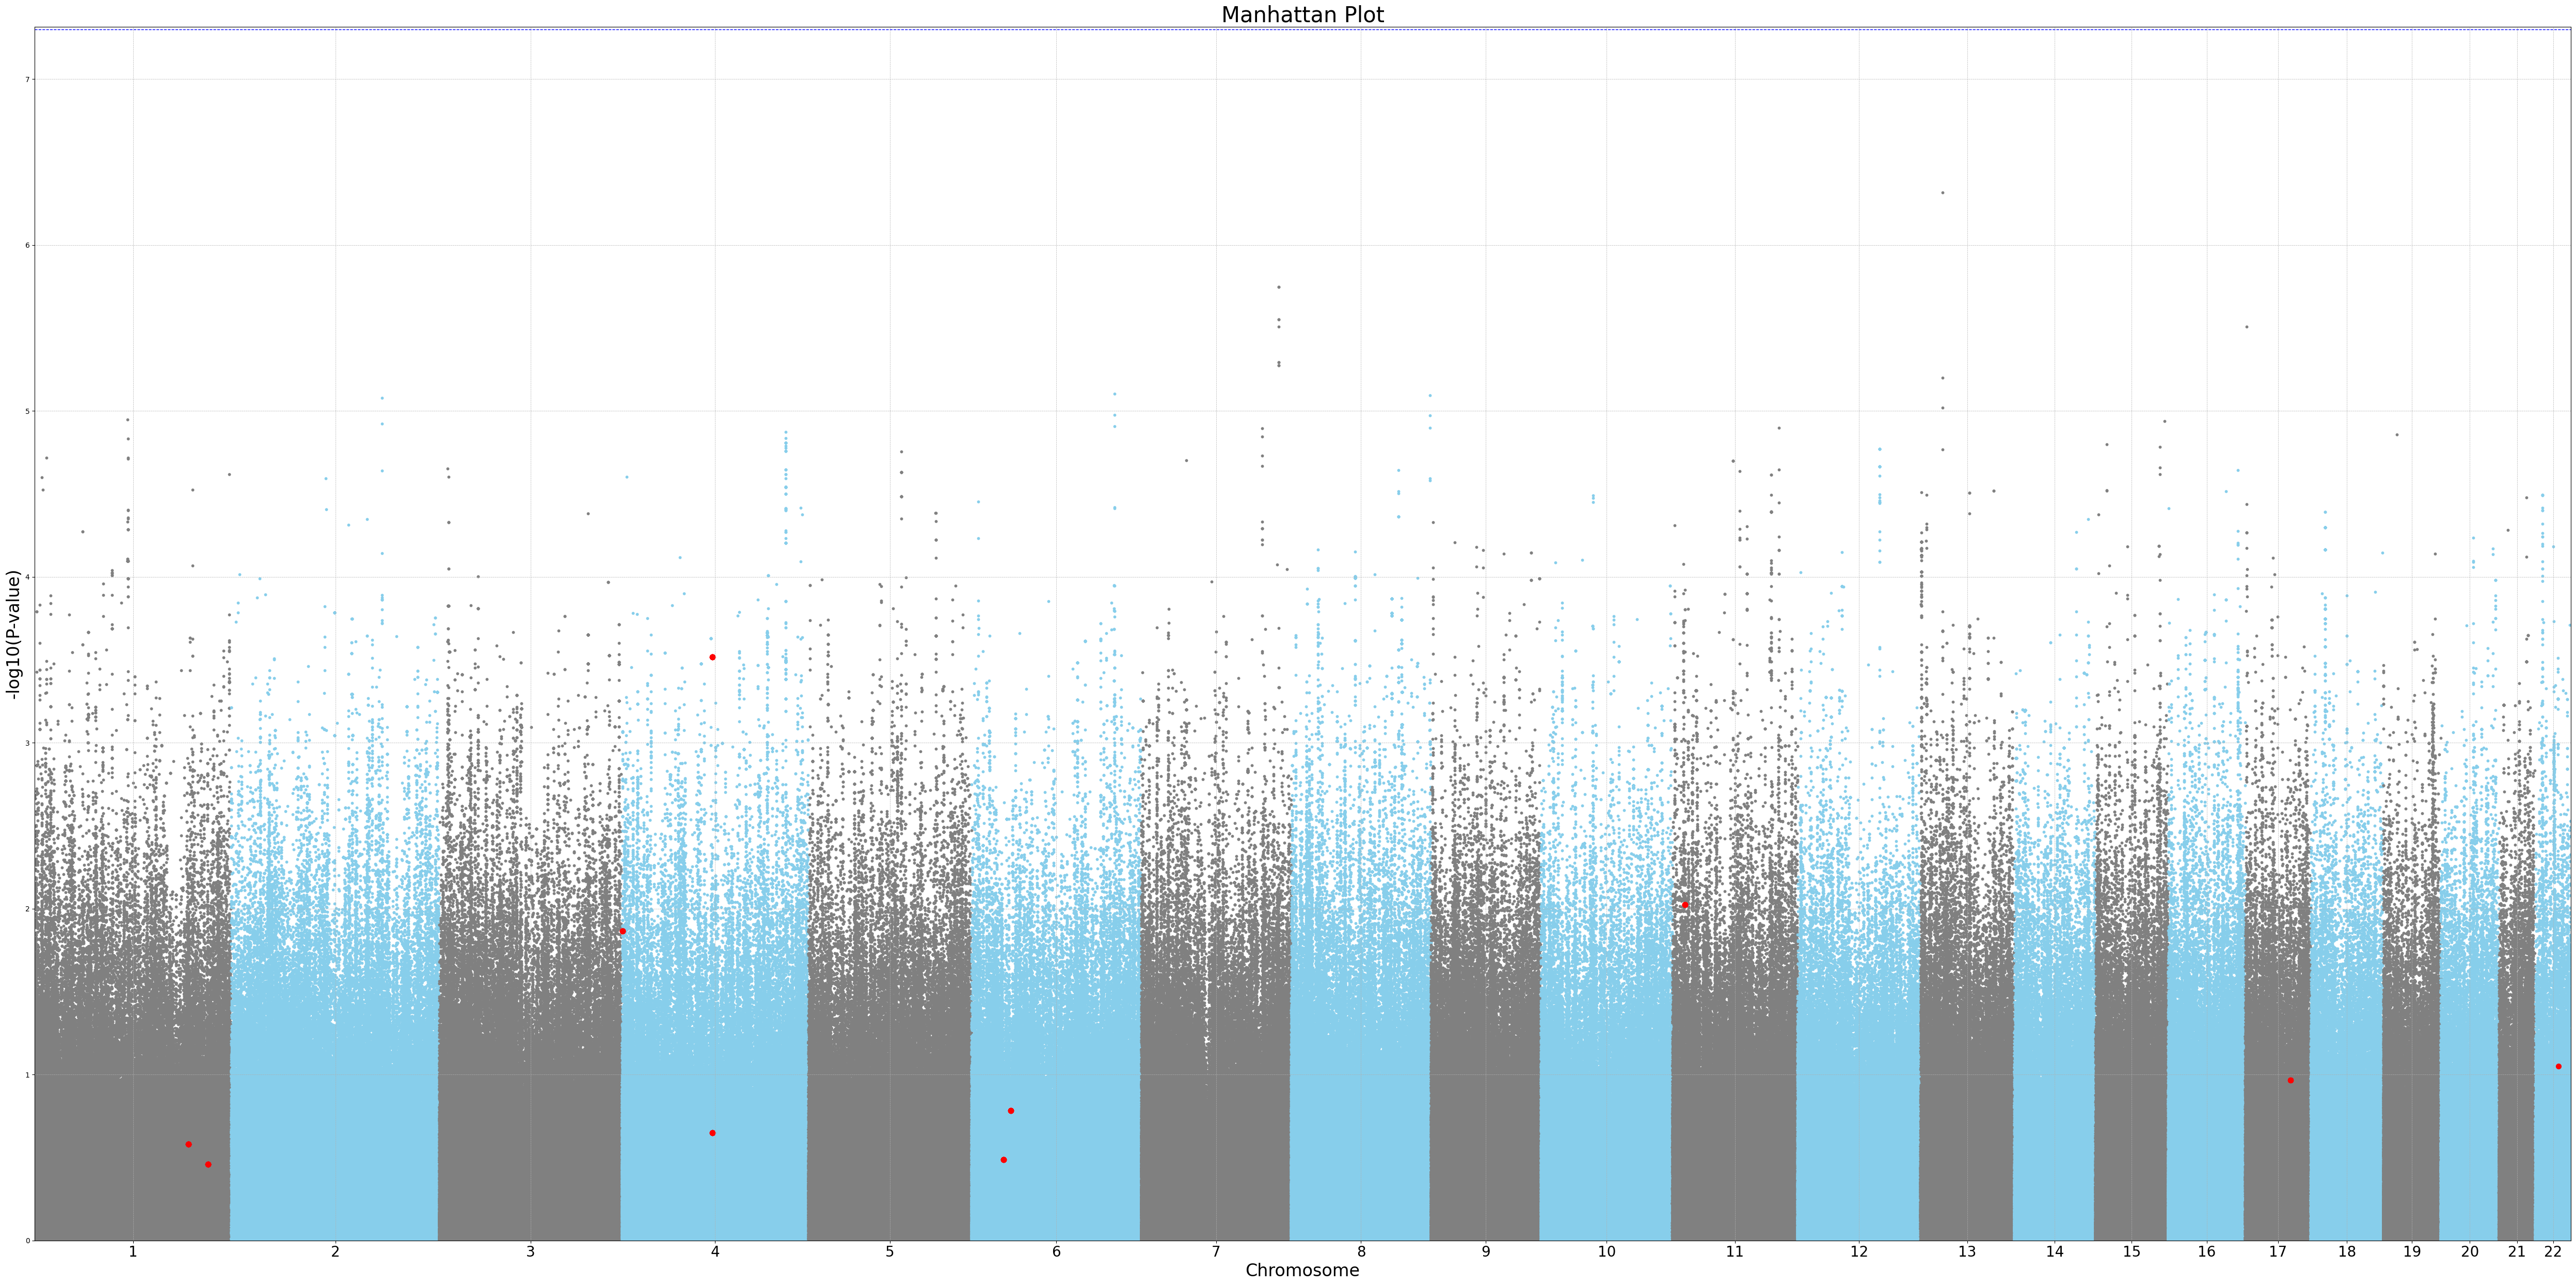

In [12]:
gwas.manhattan_plot()

{'pass': True,
 'step': 'qq_plot',
 'output': {'plink_out': '/home/luis/data/testDownStream/outputData/gwas_analysis'}}

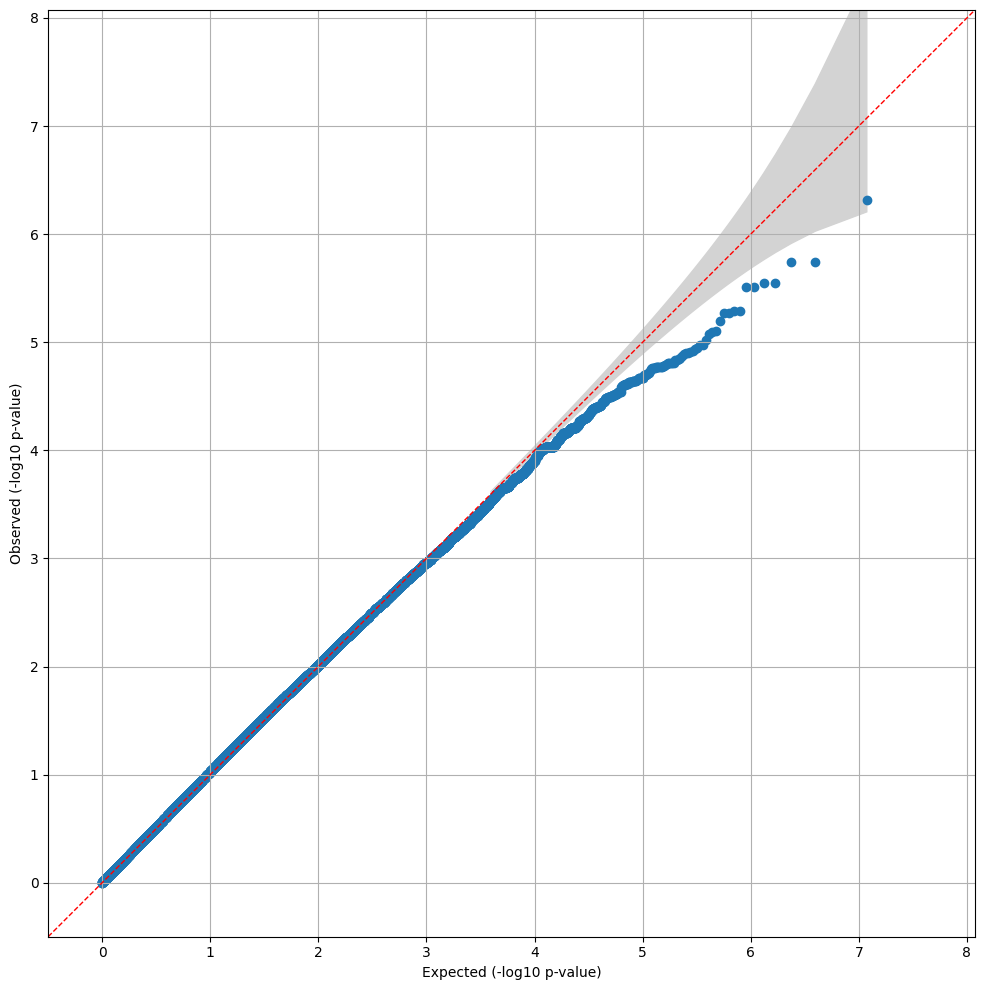

In [3]:
gwas.qq_plot()